In [ ]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = "D:/Desktop/Plant Disease Recognition/Train/Train/Healthy"
train_files_powdery = "D:/Desktop/Plant Disease Recognition/Train/Train/Healthy"
train_files_rust = "D:/Desktop/Plant Disease Recognition/Train/Train/Healthy"

test_files_healthy = "D:/Desktop/Plant Disease Recognition/Test/Test/Healthy"
test_files_powdery = "D:/Desktop/Plant Disease Recognition/Test/Test/Powdery"
test_files_rust = "D:/Desktop/Plant Disease Recognition/Test/Test/Rust"

valid_files_healthy = "D:/Desktop/Plant Disease Recognition/Validation/Validation/Healthy"
valid_files_powdery = "D:/Desktop/Plant Disease Recognition/Validation/Validation/Healthy"
valid_files_rust = "D:/Desktop/Plant Disease Recognition/Validation/Validation/Healthy"


print("Number of healthy leaf images in training set:", total_files(train_files_healthy))
print("Number of powder leaf images in training set:", total_files(train_files_powdery))
print("Number of rusty leaf images in training set:", total_files(train_files_rust))

print("--------------------------------------------------------------------------------")

print("Number of healthy leaf images in test set:", total_files(test_files_healthy))
print("Number of powder leaf images in test set:", total_files(test_files_powdery))
print("Number of rusty leaf images in test set:", total_files(test_files_rust))

print("--------------------------------------------------------------------------------")

print("Number of healthy leaf images in validation set:", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set:", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set:", total_files(valid_files_rust))

Number of healthy leaf images in training set: 458
Number of powder leaf images in training set: 458
Number of rusty leaf images in training set: 458
--------------------------------------------------------------------------------
Number of healthy leaf images in test set: 50
Number of powder leaf images in test set: 50
Number of rusty leaf images in test set: 50
--------------------------------------------------------------------------------
Number of healthy leaf images in validation set: 20
Number of powder leaf images in validation set: 20
Number of rusty leaf images in validation set: 20


## Load Orignal Image

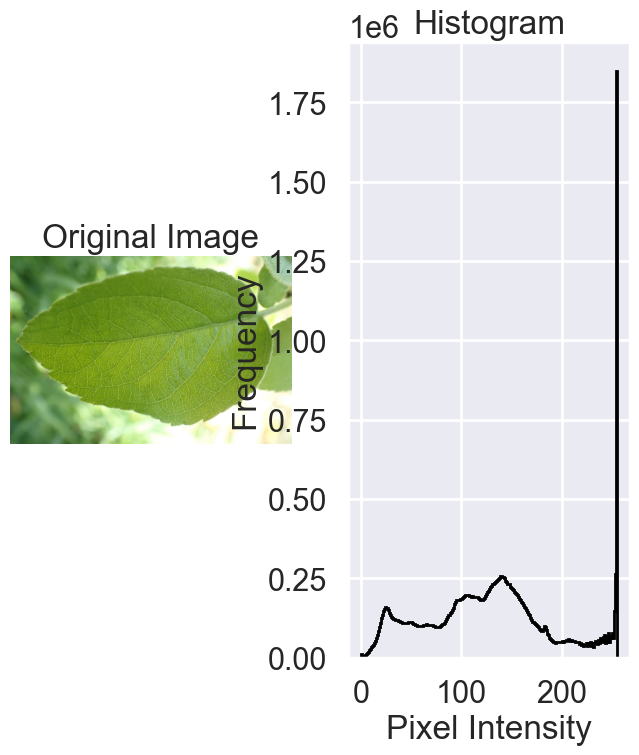

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_image_and_hist(image, title="Image"):
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), bins=256, histtype='step', color='black')
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

image_path = "D:/Desktop/Plant Disease Recognition/Test/Test/Healthy/8e77857194a59a87.jpg"
image = cv2.imread(image_path)

plot_image_and_hist(image, title="Original Image")


# Apply K-means Clustering

C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


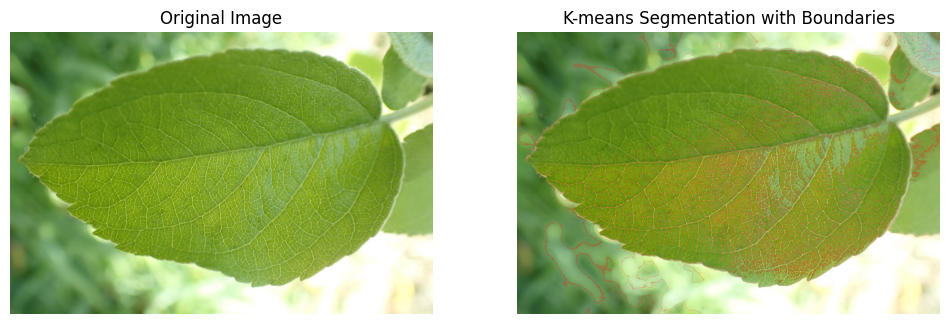

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
reshaped_image = image_rgb.reshape((-1, 3))

k = 2  
kmeans = KMeans(n_clusters=k, random_state=0).fit(reshaped_image)
clustered_pixels = kmeans.labels_.reshape(image.shape[:2])
boundary_image = image_rgb.copy()
for i in range(1, k + 1):
    edges = cv2.Canny((clustered_pixels == i).astype(np.uint8) * 255, 100, 200)
    boundary_image[edges > 0] = [255, 0, 0]  

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(boundary_image)
plt.title("K-means Segmentation with Boundaries")
plt.axis("off")

plt.show()


# Adjusting RGB

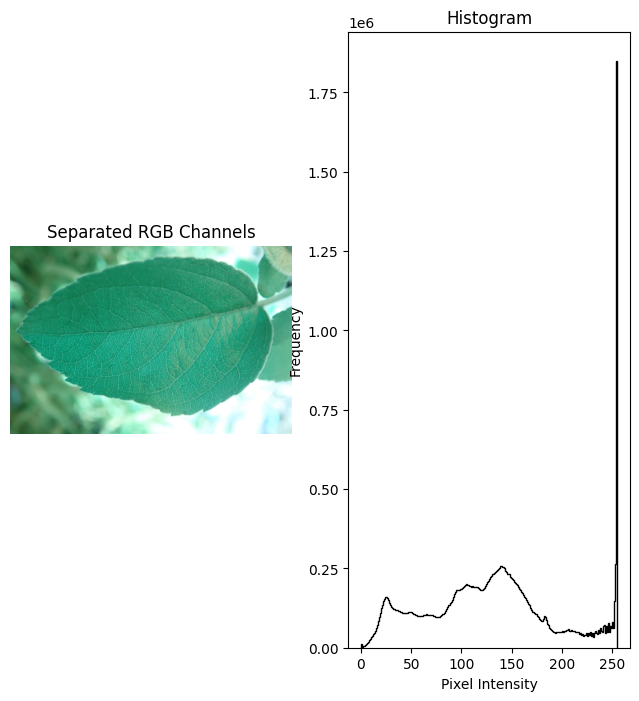

In [ ]:
def separate_rgb_channels(image):
    (B, G, R) = cv2.split(image)
    return R, G, B

R, G, B = separate_rgb_channels(image)
separated_rgb_image = cv2.merge([R, G, B])

plot_image_and_hist(separated_rgb_image, title="Separated RGB Channels")


# Separating HSV

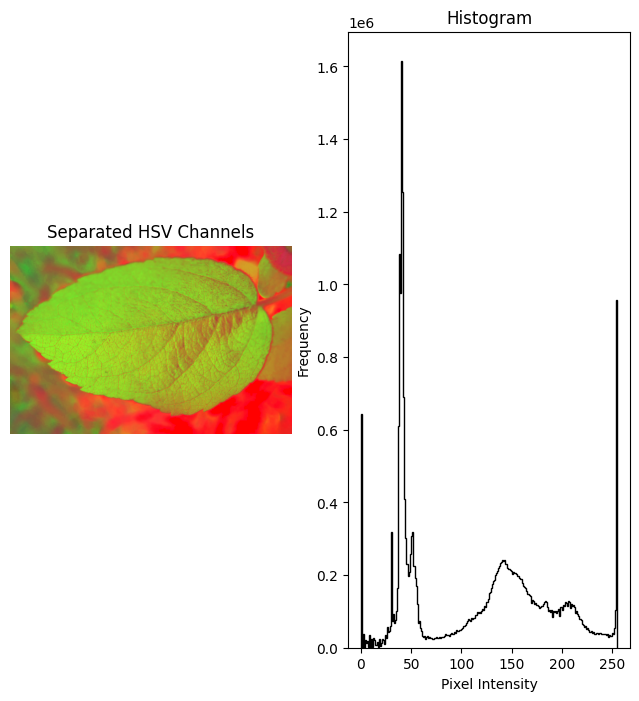

In [ ]:
def separate_hsv_channels(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(hsv_image)
    return H, S, V

H, S, V = separate_hsv_channels(image)
hsv_separated_image = cv2.merge([H, S, V])

plot_image_and_hist(hsv_separated_image, title="Separated HSV Channels")


# Edge Detection Filters

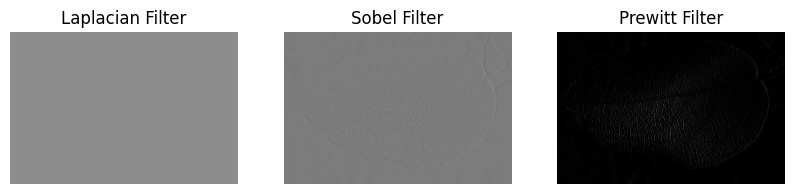

In [ ]:
def apply_edge_detection_filters(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_image = cv2.Laplacian(gray_image, cv2.CV_64F)
    sobel_image = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    prewitt_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_image_x = cv2.filter2D(gray_image, -1, prewitt_kernel_x)
    
    return laplacian_image, sobel_image, prewitt_image_x

laplacian_image, sobel_image, prewitt_image = apply_edge_detection_filters(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(laplacian_image, cmap='gray')
plt.title("Laplacian Filter")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_image, cmap='gray')
plt.title("Sobel Filter")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(prewitt_image, cmap='gray')
plt.title("Prewitt Filter")
plt.axis('off')
plt.show()


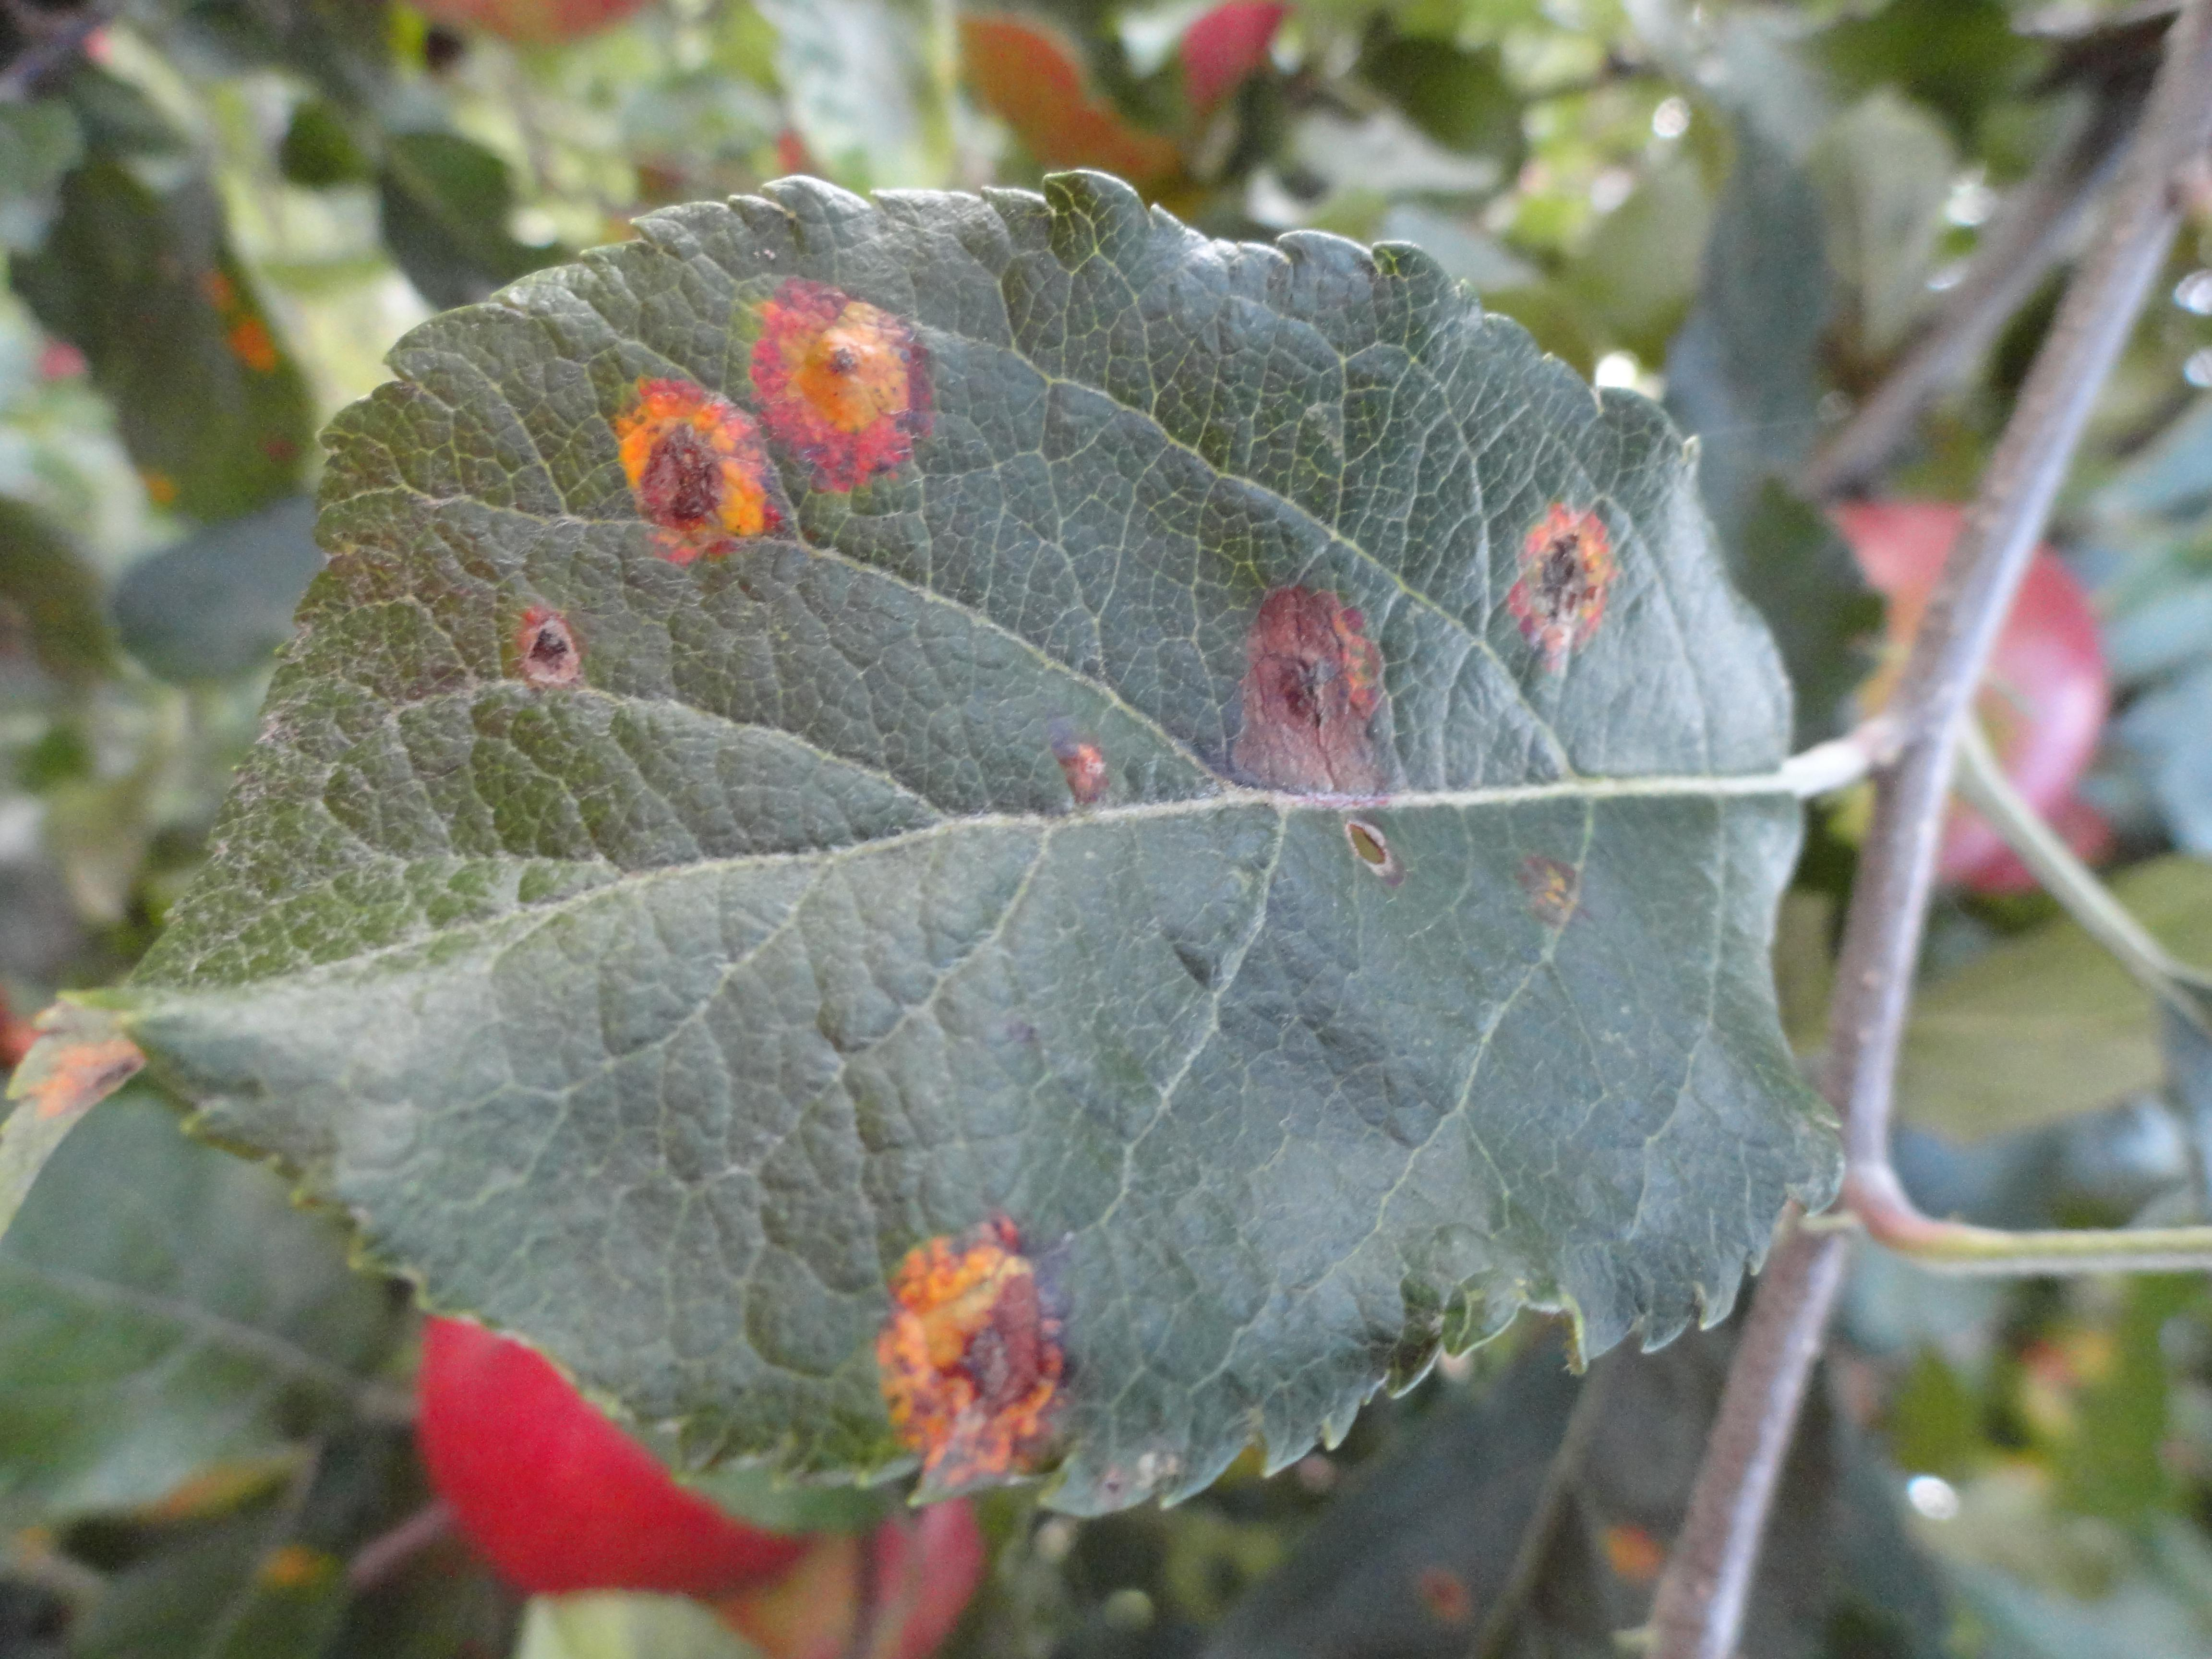

In [17]:
image_path = "D:/Desktop/Plant Disease Recognition/Test/Test/Rust/86d647d50695364f.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory( "D:/Desktop/Plant Disease Recognition/Train/Train",
                                                                                          target_size=(225, 225),
                                                                                         batch_size=32,
                                                                                          class_mode='categorical')

validation_generator = test_datagen.flow_from_directory("D:/Desktop/Plant Disease Recognition/Validation/Validation",
target_size=(225, 225),
batch_size=32,
class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training Data

In [25]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16)

Epoch 1/5


C:\Users\Jibran\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 225s 5s/step - accuracy: 0.3984 - loss: 1.9766 - val_accuracy: 0.6833 - val_loss: 0.6974
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - accuracy: 0.7612 - loss: 0.5493 - val_accuracy: 0.8833 - val_loss: 0.4602
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.8434 - loss: 0.4145 - val_accuracy: 0.7667 - val_loss: 0.5219
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 171s 4s/step - accuracy: 0.8805 - loss: 0.3196 - val_accuracy: 0.8833 - val_loss: 0.5540
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.9244 - loss: 0.2336 - val_accuracy: 0.8500 - val_loss: 0.4221


# Validation

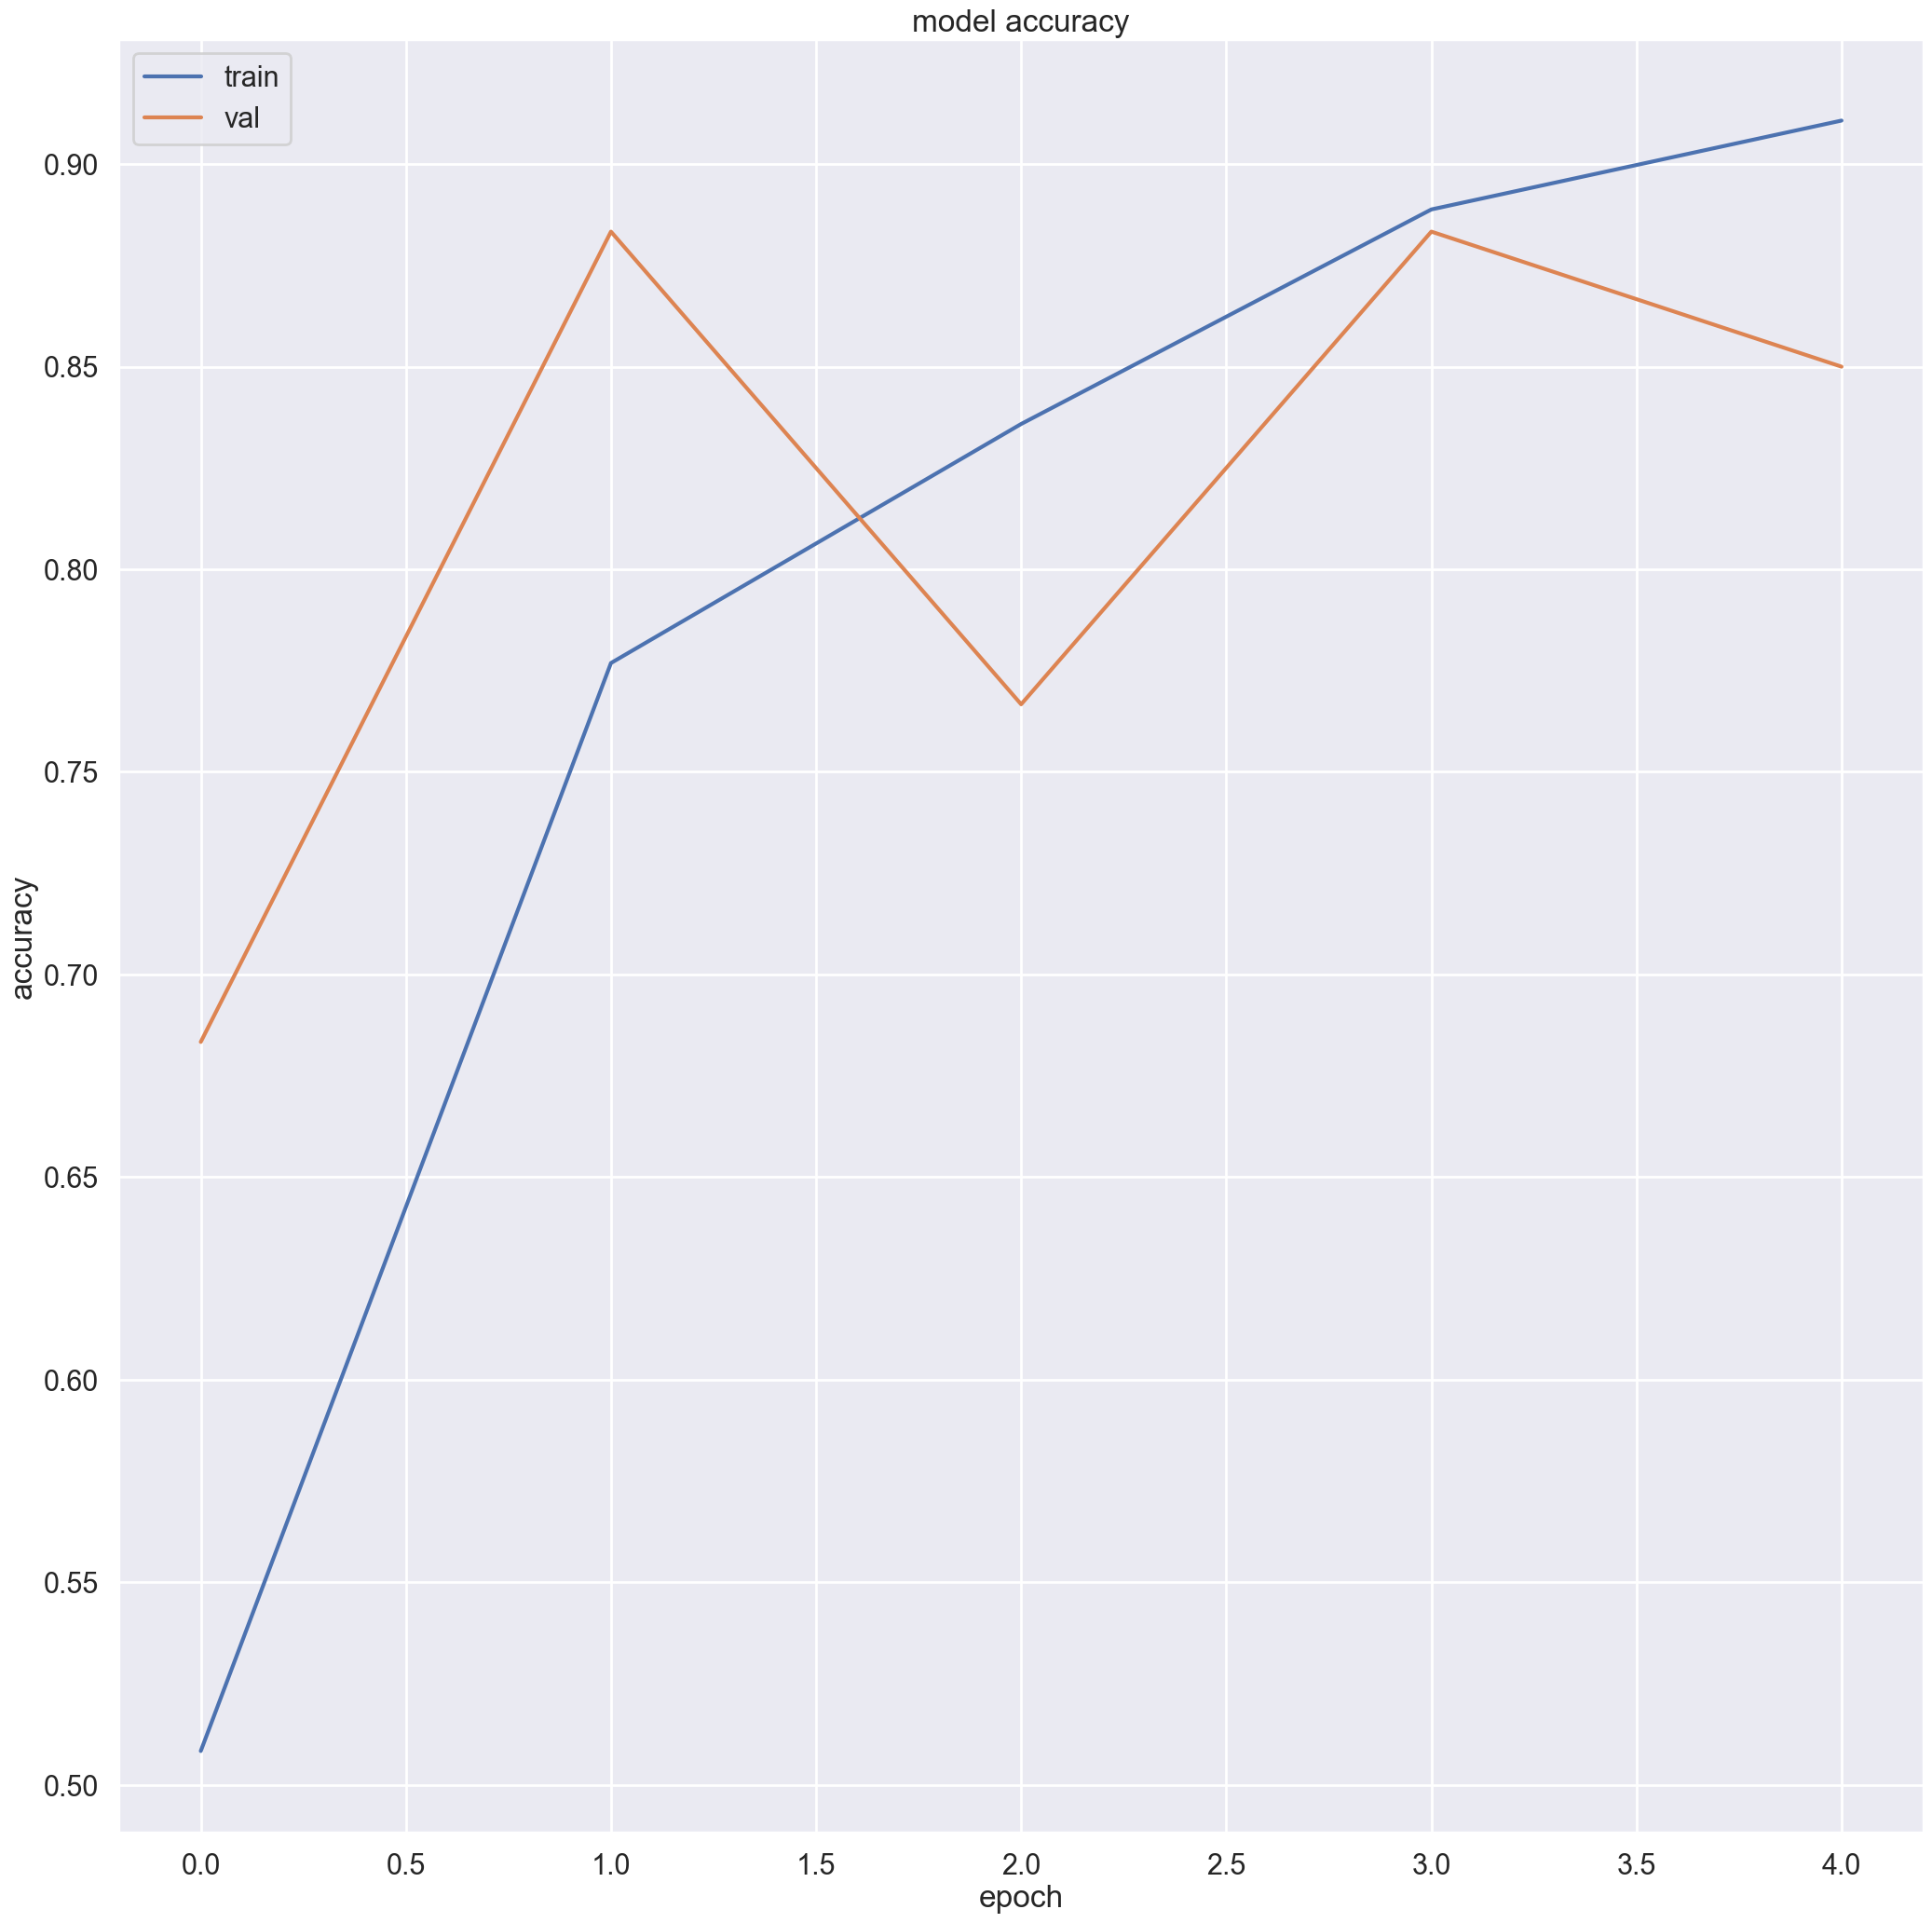

In [26]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [27]:
model.save("model.h5")

# Predictions

In [66]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(225, 225)):
    """
    Preprocess the input image:
    - Resize to target size
    - Convert to array
    - Normalize pixel values
    - Add batch dimension
    """
    img = load_img(image_path, target_size=target_size) 
    x = img_to_array(img)  
    x = x.astype('float32') / 255. 
    x = np.expand_dims(x, axis=0)  
    return img, x

image_path = "D:/Downloads/Downloads/powder2.jpeg" # Healthy1.jpeg,Healthy2.jpeg, powder1.jpeg, powder2.jpeg, rust,jpg
original_image, x = preprocess_image(image_path)

predictions = model.predict(x)
predicted_index = np.argmax(predictions)  

labels = train_generator.class_indices  
labels = {v: k for k, v in labels.items()} 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [67]:
predicted_label = labels[predicted_index]

if predicted_label == "Healthy":
    message = "The plant is healthy. No action is needed!"
elif predicted_label == "Rust":
    message = "The plant has rust. Consider using a fungicide or pruning affected leaves."
elif predicted_label == "Powdery Mildew":
    message = "The plant has powdery mildew. Ensure proper ventilation and consider treating with a fungicide."
else:
    message = f"The plant is classified as {predicted_label}. Further analysis may be needed."

print(f"Predicted Label: {predicted_label}")
print(f"Message: {message}")


Predicted Label: Powdery
Message: The plant is classified as Powdery. Further analysis may be needed.
